In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

url=r'C:\Users\prashant\Downloads\titanic.csv'
df = pd.read_csv(url)

df.head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


In [3]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [4]:
duplicates_count = df.duplicated().sum()
print(duplicates_count)


0


In [5]:
df = df.drop(["Name"], axis=1)
df.head(2)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [6]:
df["Sex"] = df["Sex"].replace({"male":0, "female":1})
df.head(2)

C:\Users\prashant\AppData\Local\Temp\ipykernel_27216\1131335309.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace({"male":0, "female":1})


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833


In [7]:
numeric_columns = df.select_dtypes(['int64', 'Float64']).columns
numeric_columns_plot = ['Age', 'Parents/Children Aboard', 'Siblings/Spouses Aboard', 'Pclass', 'Sex', 'Fare']

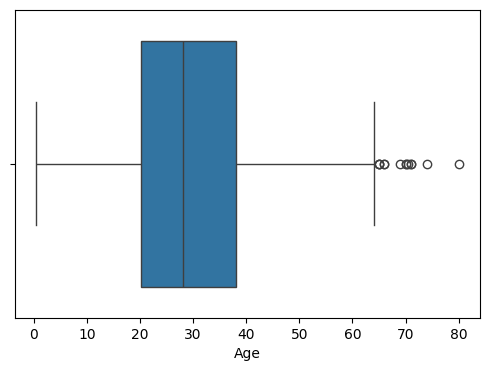

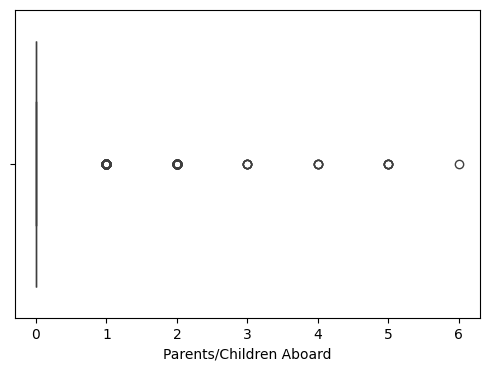

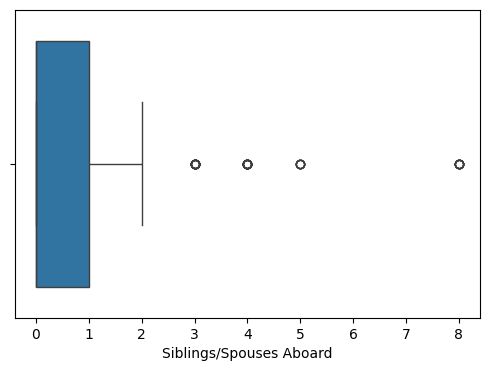

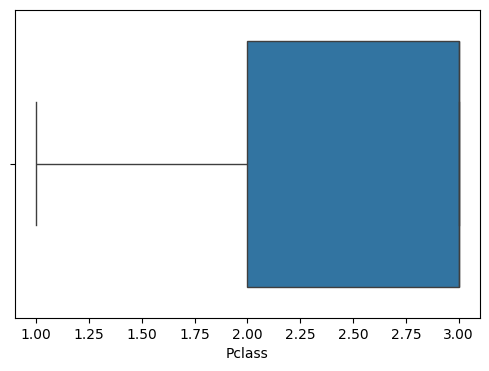

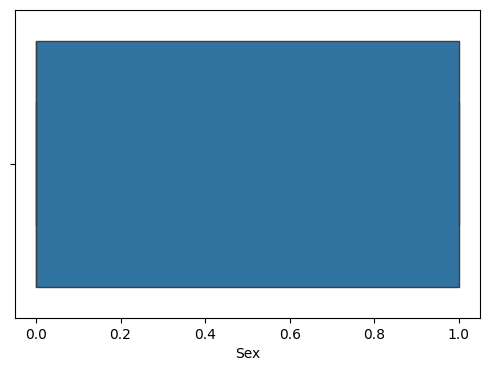

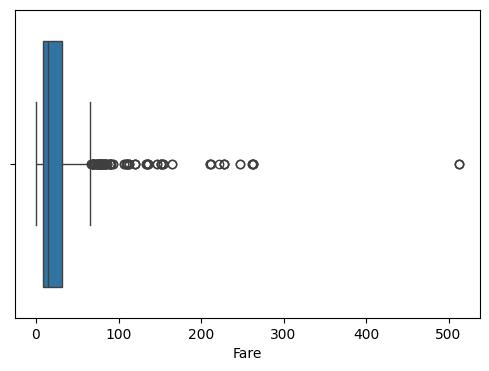

In [8]:
for col in numeric_columns_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.show()

In [9]:
df.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,0.354002,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.32920


## Insights
1. Many Titanic passengers were elderly, and age 80 is real and part of the true distribution. It’s not a data error.
2. Although fare has extreme high values, we will not remove them because they represent genuine first-class tickets.
3. Although large family sizes seem like outliers, we will not remove them since they reflect actual family groups on the ship.

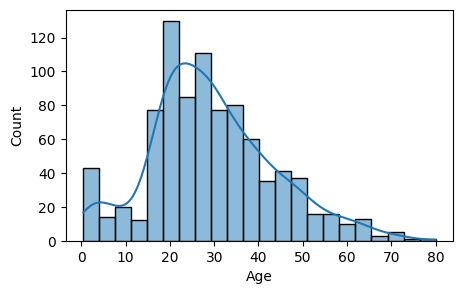

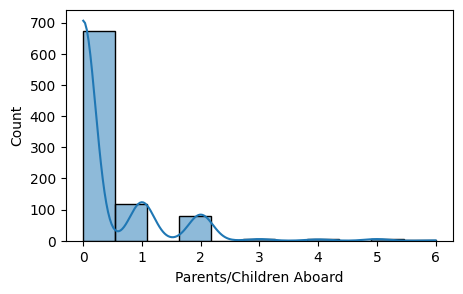

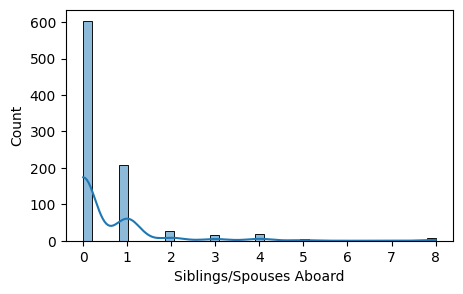

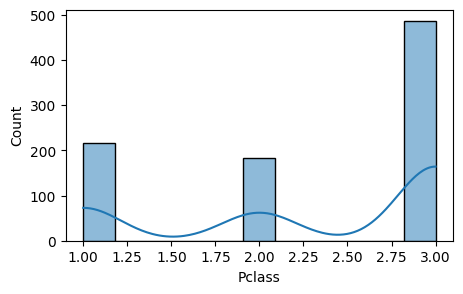

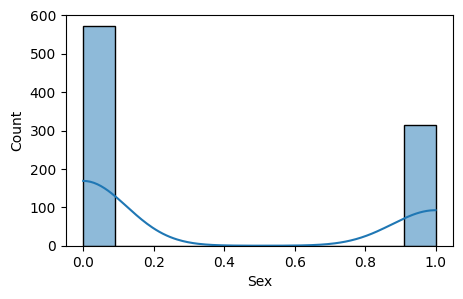

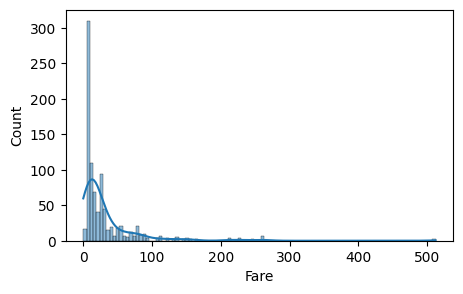

In [10]:
for col in numeric_columns_plot:
    plt.figure(figsize=(5, 3))
    sns.histplot(x=df[col], kde=True)
    plt.show()

<h3 align="center" style="color: blue">Exploratory Data Analysis</h3>

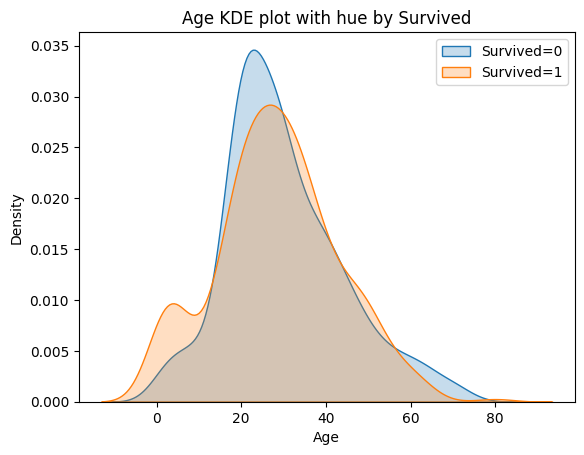

In [11]:
sns.kdeplot(df[df.Survived==0]['Age'], fill=True, label="Survived=0")
sns.kdeplot(df[df.Survived==1]['Age'], fill=True, label="Survived=1")

plt.title("Age KDE plot with hue by Survived")
plt.legend()
plt.show()


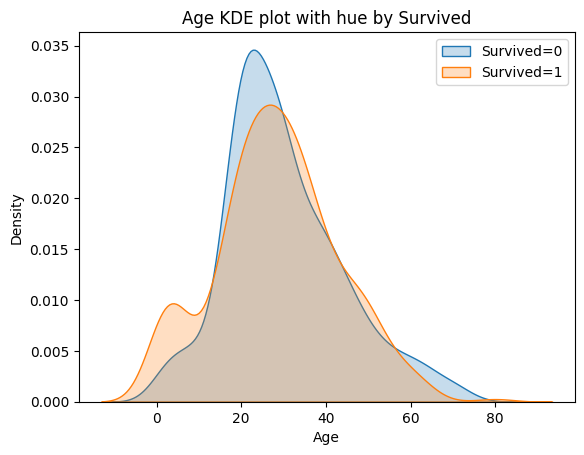

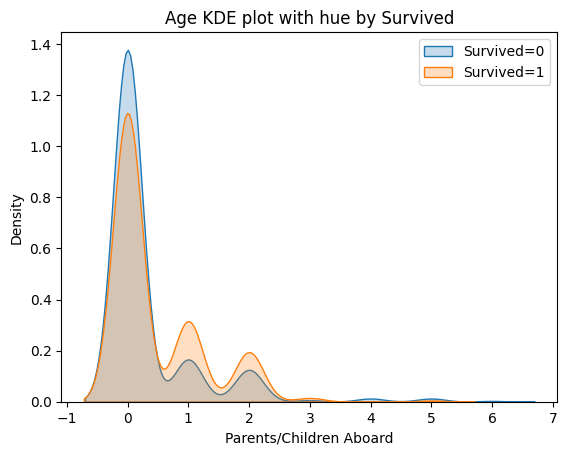

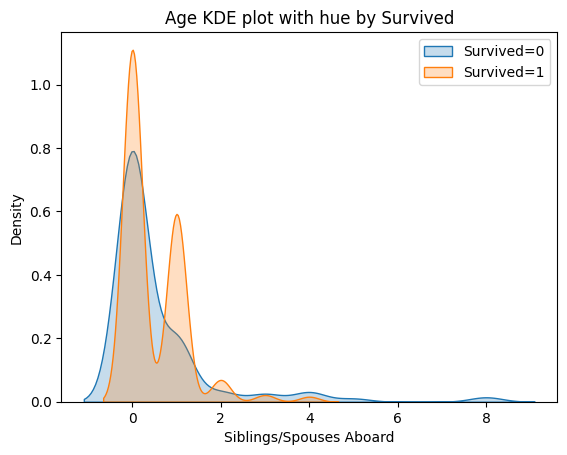

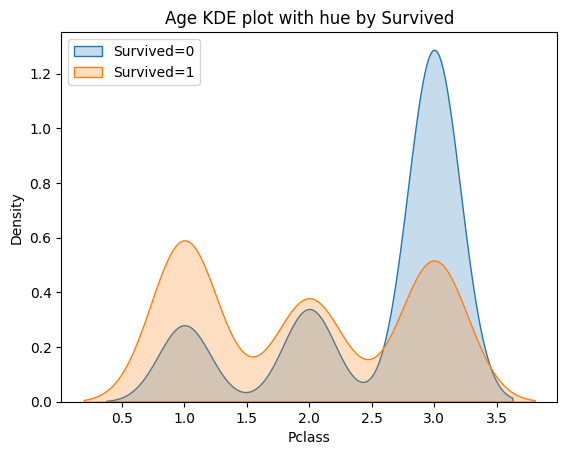

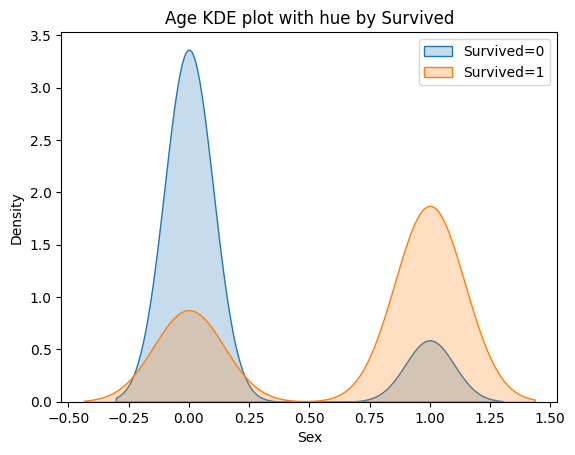

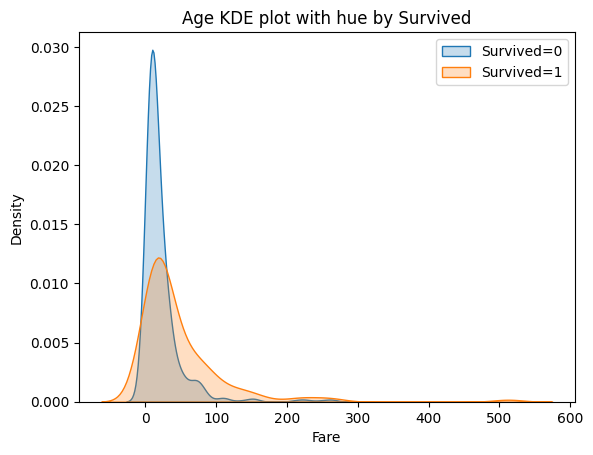

In [12]:
for col in numeric_columns_plot:
    sns.kdeplot(df[df.Survived==0][col], fill=True, label="Survived=0")
    sns.kdeplot(df[df.Survived==1][col], fill=True, label="Survived=1")

    plt.title("Age KDE plot with hue by Survived")
    plt.legend()
    plt.show()


# Insights
1. Sex and Pclass are the strongest predictors of survival.
2. Age is moderately predictive.
3. Siblings/Spouses and (Parents/Children) show weaker predictive power. 
4. why Siblings/Spouses and (Parents/Children) did not give any signs of being strong predictors? May be when we combine these  two and get 
FamilySize that may have influence on the target variable. we will explore more later

<h3 align="center" style="color: blue"> Feature Engineering <h3/>

In [13]:
df['familysize'] = df['Parents/Children Aboard'] + df['Siblings/Spouses Aboard'] + 1
df.head(2)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,familysize
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,2


In [14]:
df['familysize'].describe()

count    887.000000
mean       1.908681
std        1.615949
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: familysize, dtype: float64

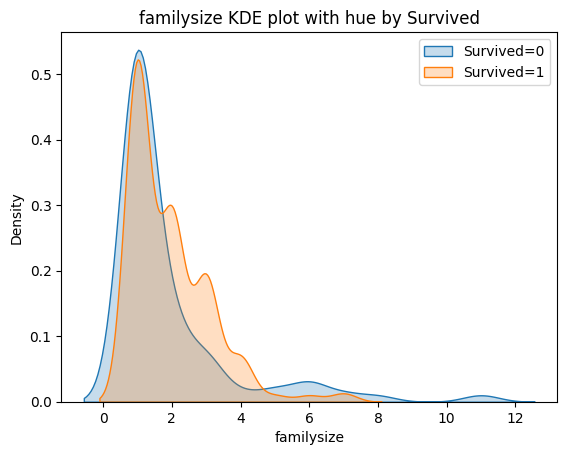

In [15]:
sns.kdeplot(df[df.Survived==0]['familysize'], fill=True, label="Survived=0")
sns.kdeplot(df[df.Survived==1]['familysize'], fill=True, label="Survived=1")

plt.title("familysize KDE plot with hue by Survived")
plt.legend()
plt.show()

In [16]:
df['FareBin'] = pd.cut(df['Fare'], bins=[-1, 7.93, 14.45, 31.13, 600], labels=[0,1,2,3])
df.head(2)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,familysize,FareBin
0,0,3,0,22.0,1,0,7.2500,2,0
1,1,1,1,38.0,1,0,71.2833,2,3


## Feature Selection

In [17]:
df_1 = df.drop(['Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'], axis=1)
df_1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'familysize', 'FareBin'], dtype='object')

In [18]:
X = df_1.drop(["Survived"], axis=1)
y=df_1["Survived"]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      887 non-null    int64   
 1   Sex         887 non-null    int64   
 2   Age         887 non-null    float64 
 3   familysize  887 non-null    int64   
 4   FareBin     887 non-null    category
dtypes: category(1), float64(1), int64(3)
memory usage: 28.9 KB


In [19]:
##splitting the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'familysize', 'FareBin'], dtype='object')

In [20]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ["Age"]

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 730 to 102
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      709 non-null    int64   
 1   Sex         709 non-null    int64   
 2   Age         709 non-null    float64 
 3   familysize  709 non-null    int64   
 4   FareBin     709 non-null    category
dtypes: category(1), float64(1), int64(3)
memory usage: 28.6 KB


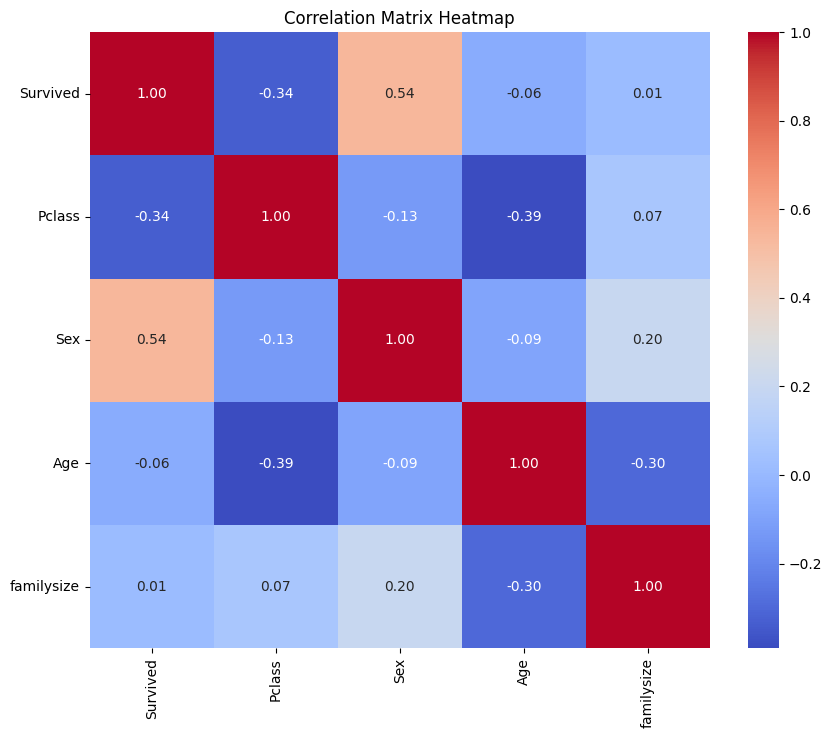

In [23]:
cm = df_1.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
## Insights


In [24]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum' : 'good'})
    grouped['bad'] = grouped['total'] - grouped['good']
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct'] / grouped['bad_pct'])
    grouped['iv'] = grouped['woe']*(grouped['good_pct'] - grouped['bad_pct'])
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

    total_iv = grouped['iv'].sum()

    return grouped, total_iv

In [25]:

total_iv_values={}
for feature in X_train.columns:
    
    if feature in ['Pclass', 'Sex', 'Age', 'FareBin']:
        temp = pd.concat([X_train[feature], y_train], axis=1)
        _ , total_iv = calculate_woe_iv(temp, feature, 'Survived')
        
    elif feature == 'familysize':
        X_binned = pd.qcut(X_train[feature], q=4, duplicates='drop', labels=False)
        temp2 = pd.concat([X_binned.rename(feature), y_train], axis=1)
        _, total_iv = calculate_woe_iv(temp2, feature, 'Survived')

    total_iv_values[feature] = total_iv
        

total_iv_values

C:\Users\prashant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\prashant\AppData\Local\Temp\ipykernel_27216\3929086158.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature)[target].agg(['count','sum'])


{'Pclass': np.float64(0.5386920692360413),
 'Sex': np.float64(1.4890659699962594),
 'Age': np.float64(0.31170947748447964),
 'familysize': np.float64(0.015385414142198748),
 'FareBin': np.float64(0.35855117092070066)}

In [26]:
pd.options.display.float_format = '{:.3f}'.format


iv_df = pd.DataFrame(list(total_iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
1,Sex,1.489
0,Pclass,0.539
4,FareBin,0.359
2,Age,0.312
3,familysize,0.015


# Insights
1. If the Information Value  of a feature is less than 0.02, 
it indicates that the feature has no meaningful predictive power and can be considered insignificant for the model
2. so we are going to consder feature selection for further process based upon the values of  Information Value

In [27]:
selected_features_iv = [ feature for feature, iv in total_iv_values.items() if iv > 0.02]  
selected_features_iv

['Pclass', 'Sex', 'Age', 'FareBin']

## Feature Encoding

In [28]:
X_train_reduced = X_train[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [29]:
X_train_reduced.head(2)

,Pclass,Sex,Age,FareBin
730,2,0,0.281,1
390,3,0,0.345,0


In [30]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)

X_train_encoded.head(2)

,Pclass,Sex,Age,FareBin_1,FareBin_2,FareBin_3
730,2,0,0.281,True,False,False
390,3,0,0.345,False,False,False


<h3 align="center" style="color: blue">Model Training</h3>

# Attempt 1
1. LogisticRegression, RandomForestClassifier and XGBClassifier

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_model  = LogisticRegression()
log_model .fit(X_train_encoded, y_train)
y_pred_log  = log_model .predict(X_test_encoded)

cr = classification_report(y_test, y_pred_log )
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       111
           1       0.73      0.57      0.64        67

    accuracy                           0.76       178
   macro avg       0.75      0.72      0.73       178
weighted avg       0.76      0.76      0.75       178



In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier()
rf_model .fit(X_train_encoded, y_train)
y_pred_rf  = rf_model.predict(X_test_encoded)

cr = classification_report(y_test, y_pred_rf )
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       111
           1       0.73      0.69      0.71        67

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.79      0.79       178



In [33]:
from xgboost import XGBClassifier

xgb_model  = XGBClassifier()
xgb_model.fit(X_train_encoded, y_train)
y_pred_xgb  = xgb_model.predict(X_test_encoded)

cr = classification_report(y_test, y_pred_xgb )
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       111
           1       0.79      0.69      0.74        67

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



In [34]:
# checking  wthere there is class imbalance 
y_train.value_counts()

Survived
0    434
1    275
Name: count, dtype: int64

# Attempt 2
1.LogisticRegression & XGB
2.Handle class imbalance using under sampling

In [35]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)
y_train_rus.value_counts()

Survived
0    275
1    275
Name: count, dtype: int64

In [36]:
log_model  = LogisticRegression()
log_model .fit(X_train_rus, y_train_rus)
y_pred_log  = log_model .predict(X_test_encoded)

cr = classification_report(y_test, y_pred_log )
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       111
           1       0.70      0.69      0.69        67

    accuracy                           0.77       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.77      0.77      0.77       178



In [37]:
xgb_model  = XGBClassifier()
xgb_model.fit(X_train_rus, y_train_rus)
y_pred_xgb  = xgb_model.predict(X_test_encoded)

cr = classification_report(y_test, y_pred_xgb )
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       111
           1       0.69      0.73      0.71        67

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.78      0.78       178



# Attemp3
1. LogisticRegression
2. Handle Class imbalance using SMOTE Tomek


In [38]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

Survived
0    418
1    418
Name: count, dtype: int64

In [39]:
log_model_smt  = LogisticRegression()
log_model_smt .fit(X_train_smt, y_train_smt)
y_pred_log  = log_model_smt .predict(X_test_encoded)

cr = classification_report(y_test, y_pred_log )
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       111
           1       0.70      0.78      0.74        67

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



In [40]:
xgb_model_smt  = XGBClassifier()
xgb_model_smt.fit(X_train_smt, y_train_smt)
y_pred_xgb  = xgb_model_smt.predict(X_test_encoded)

cr = classification_report(y_test, y_pred_xgb )
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       111
           1       0.75      0.69      0.72        67

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



In [ ]:
## Note: Since our logisticregression model is giving us the best results we are going with it.

In [44]:
best_model = log_model_smt

In [45]:
## to get probabilities into floating point number

import numpy as np
np.set_printoptions(suppress=True, precision=8)

In [46]:
from sklearn.metrics import roc_curve

probabilities = best_model.predict_proba(X_test_encoded)
positive_probabilities = probabilities[:, 1]

fpr, tpr, thresolds = roc_curve(y_test, positive_probabilities)


In [47]:
from sklearn.metrics import auc
area = auc(fpr, tpr)
area

0.8149119268522254

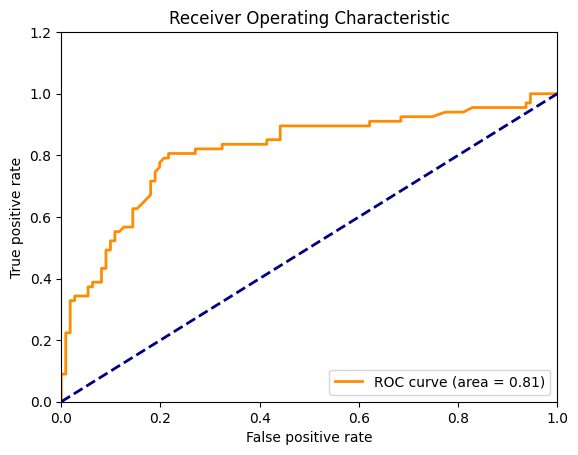

In [49]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)'% area)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Insights
1. model can correctly distinguish between survivors and non-survivors 81% of the time.

<h3 align="center" style="color: blue"> Conclusion</h3>

Our analysis shows that Logistic Regression delivers the strongest and most reliable performance, achieving  81% AUC–ROC score.
Based on this result, we selected Logistic Regression as our final model for the project.